In [2]:
# Installing the necessary libraries
!pip install gdown
!pip install tensorflow scikit-learn
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 117.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 122.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.1 MB/s eta 0:00:00


In [3]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, roc_auc_score,
                            roc_curve, auc, precision_recall_curve)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE
import tensorflow as tf

In [4]:
# Downloading the file
!gdown 'https://drive.google.com/uc?id=1HXidIdQPg6ru4gjduf7tsIlfJkYKAyX1' --fuzzy

# Unzip
!unzip Credit_card_fraud.zip


Downloading...
From (original): https://drive.google.com/uc?id=1HXidIdQPg6ru4gjduf7tsIlfJkYKAyX1
From (redirected): https://drive.google.com/uc?id=1HXidIdQPg6ru4gjduf7tsIlfJkYKAyX1&confirm=t&uuid=07da994d-37cb-4958-b4d1-952266af52ae
To: /content/Credit_card_fraud.zip
100% 69.2M/69.2M [00:00<00:00, 138MB/s]
Archive:  Credit_card_fraud.zip
  inflating: creditcard.csv          


In [5]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

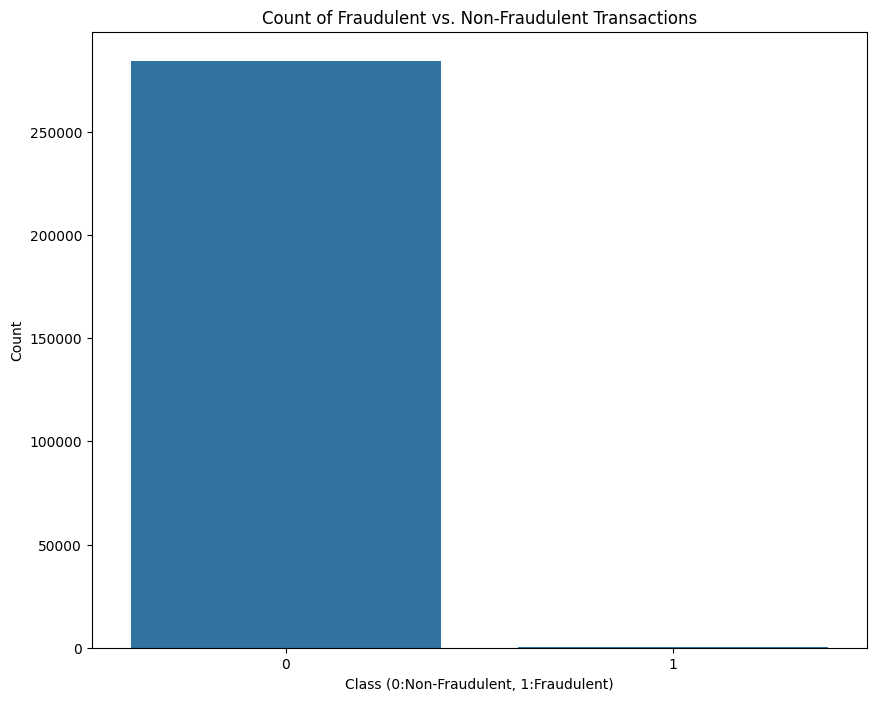

In [7]:
# count of fraud vs. normal transactions
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')


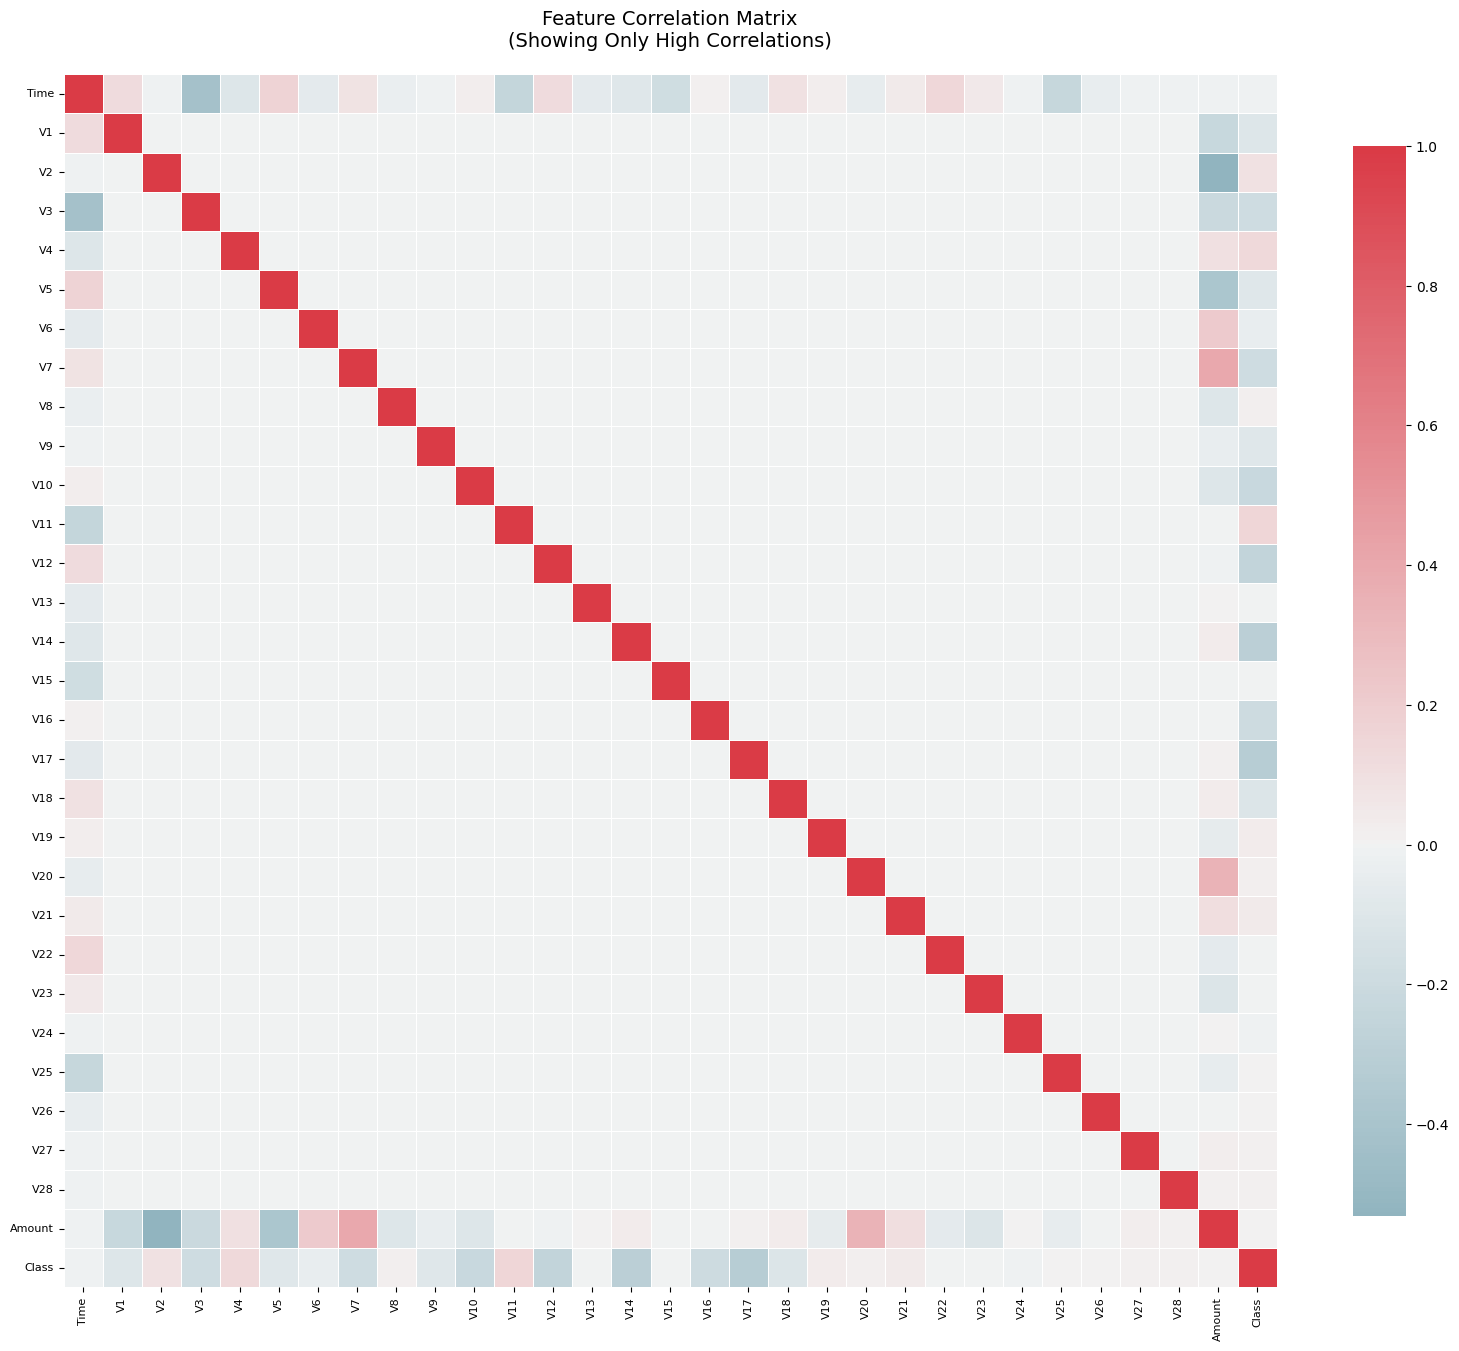

In [8]:
#finding correlation between columns and plotting heatmap
corr = df.corr()
plt.figure(figsize=(16, 14))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

# heatmap
sns.heatmap(corr,
            cmap=cmap,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Matrix\n(Showing Only High Correlations)",
          fontsize=14, pad=20)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [9]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Our data is now cleaded and ready for analysis

# Data Preprocessing

In [11]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

X = df.drop(["Class", "Time"], axis=1)
y = df["Class"]

# Scaling the 'Amount' column
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

# Balancing the dataset with SMOTE
smote = SMOTE(sampling_strategy=0.25, k_neighbors=3, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [12]:
# Balancing the dataset with SMOTE
smote = SMOTE(sampling_strategy=0.25, k_neighbors=3, random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Reshape for (CNN/LSTM)
X_reshaped = np.asarray(X_res).reshape(-1, X_res.shape[1], 1)

In [13]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_reshaped, y_res, test_size=0.2, stratify=y_res, random_state=42
)

# CNN Model

In [14]:
def build_cnn():
    model = Sequential([
        Conv1D(64, 5, activation="relu", padding="same", input_shape=(X_train.shape[1], 1)),
        Conv1D(128, 3, activation="relu", padding="same", strides=2),
        GlobalMaxPooling1D(),
        Dense(64, activation="relu"),
        Dropout(0.3),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["precision", "recall"])
    return model

cnn_model = build_cnn()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# LSTM Model

In [15]:
def build_lstm():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        Dropout(0.3),
        LSTM(32),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer=Adam(0.001), loss="binary_crossentropy", metrics=["precision", "recall"])
    return model

lstm_model = build_lstm()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# RF Model

In [16]:
# Random Forest
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_flat, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)

# Training & Evaluation

In [17]:
# Train CNN
history_cnn = cnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=2048,
    callbacks=[EarlyStopping(monitor="val_recall", patience=3, mode="max")],
    verbose=1
)

# Train LSTM
history_lstm = lstm_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=2048,
    callbacks=[EarlyStopping(monitor="val_recall", patience=3, mode="max")],
    verbose=1
)

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 34s 233ms/step - loss: 0.2652 - precision: 0.8939 - recall: 0.7949 - val_loss: 0.0776 - val_precision: 0.9830 - val_recall: 0.8889
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 30s 213ms/step - loss: 0.0687 - precision: 0.9819 - recall: 0.9021 - val_loss: 0.0461 - val_precision: 0.9859 - val_recall: 0.9381
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - loss: 0.0415 - precision: 0.9836 - recall: 0.9493 - val_loss: 0.0301 - val_precision: 0.9845 - val_recall: 0.9684
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 29s 211ms/step - loss: 0.0275 - precision: 0.9850 - recall: 0.9706 - val_loss: 0.0231 - val_precision: 0.9784 - val_recall: 0.9868
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 28s 203ms/step - loss: 0.0200 - precision: 0.9872 - recall: 0.9809 - val_loss: 0.0196 - val_precision: 0.9802 - val_recall: 0.9932
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - loss: 0.0151 - precision: 0.9890 - recall: 0.9880 - val_loss: 0.0129 - val_precision: 0.

In [18]:
def evaluate_model(model, X, y, model_type="cnn"):
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc_scores = []

    for train_idx, val_idx in skf.split(X, y):
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]

        if model_type in ["cnn", "lstm"]:
            model.fit(X_train_fold, y_train_fold, epochs=5, batch_size=2048, verbose=0)
            y_proba = model.predict(X_val_fold).ravel()
        else:  # Random Forest
            X_train_fold_flat = X_train_fold.reshape(X_train_fold.shape[0], -1)
            X_val_fold_flat = X_val_fold.reshape(X_val_fold.shape[0], -1)
            model.fit(X_train_fold_flat, y_train_fold)
            y_proba = model.predict_proba(X_val_fold_flat)[:, 1]

        auc_scores.append(roc_auc_score(y_val_fold, y_proba))

    return np.mean(auc_scores)

print("\n Cross-Validation AUC Scores ")
print(f"CNN: {evaluate_model(cnn_model, X_reshaped, y_res, 'cnn'):.4f}")
print(f"LSTM: {evaluate_model(lstm_model, X_reshaped, y_res, 'lstm'):.4f}")
print(f"Random Forest: {evaluate_model(rf_model, X_reshaped, y_res, 'rf'):.4f}")


 Cross-Validation AUC Scores 
3703/3703 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3702/3702 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
3702/3702 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
CNN: 1.0000
3703/3703 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step
3702/3702 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step
3702/3702 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step
LSTM: 0.9985
Random Forest: 1.0000


In [19]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Verify no overlap in cross-validation folds
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
for fold, (train_idx, val_idx) in enumerate(skf.split(X_reshaped, y_res)):
    overlap = np.intersect1d(train_idx, val_idx)
    print(f"Fold {fold+1}: {len(overlap)} overlapping samples")

Fold 1: 0 overlapping samples
Fold 2: 0 overlapping samples
Fold 3: 0 overlapping samples


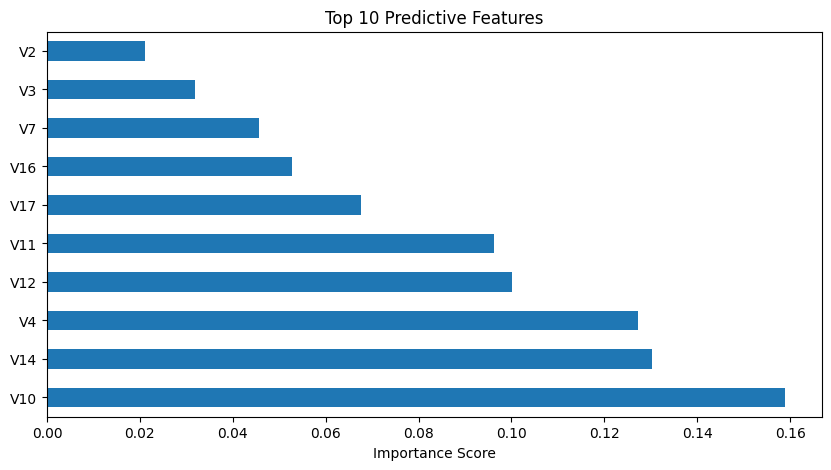

In [20]:
# Train Random Forest
rf_model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Plot top 10 features
plt.figure(figsize=(10, 5))
pd.Series(rf_model.feature_importances_, index=X.columns).nlargest(10).plot(kind='barh')
plt.title("Top 10 Predictive Features")
plt.xlabel("Importance Score")
plt.show()

# Holdout Test

In [21]:
# Spliting original data into train (60%) / validation (20%) / holdout (20%)
X_train_val, X_holdout, y_train_val, y_holdout = train_test_split(
    X_reshaped, y_res, test_size=0.2, stratify=y_res, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, stratify=y_train_val, random_state=42
)

# Retraining CNN on train+val (no holdout data)
cnn_model.fit(
    X_train_val, y_train_val,
    validation_data=(X_holdout, y_holdout),
    epochs=10,
    batch_size=2048,
    callbacks=[EarlyStopping(monitor='val_recall', patience=3, mode='max')]
)

# Evaluation on holdout data
y_proba_holdout = cnn_model.predict(X_holdout).ravel()
holdout_auc = roc_auc_score(y_holdout, y_proba_holdout)
print(f"\nHoldout AUC: {holdout_auc:.4f}")

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - loss: 0.0022 - precision: 0.9980 - recall: 0.9995 - val_loss: 0.0022 - val_precision: 0.9977 - val_recall: 0.9997
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - loss: 0.0019 - precision: 0.9982 - recall: 0.9995 - val_loss: 0.0017 - val_precision: 0.9985 - val_recall: 0.9999
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 29s 212ms/step - loss: 0.0021 - precision: 0.9980 - recall: 0.9994 - val_loss: 0.0065 - val_precision: 0.9978 - val_recall: 0.9923
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 28s 199ms/step - loss: 0.0035 - precision: 0.9970 - recall: 0.9986 - val_loss: 0.0019 - val_precision: 0.9975 - val_recall: 0.9999
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - loss: 0.0016 - precision: 0.9984 - recall: 0.9998 - val_loss: 0.0022 - val_precision: 0.9968 - val_recall: 0.9999
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 27s 196ms/step - loss: 0.0036 - precision: 0.9965 - recall: 0.9980 - val_loss: 0.0022 - val_precision: 0.

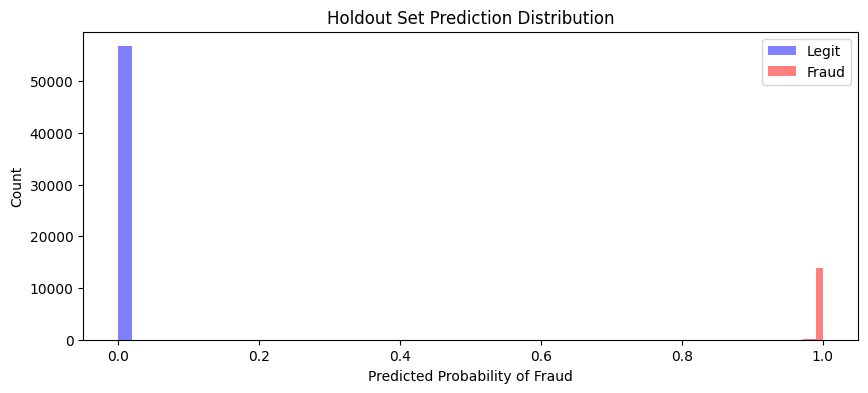

In [22]:
plt.figure(figsize=(10, 4))
plt.hist(y_proba_holdout[y_holdout==0], bins=50, alpha=0.5, label='Legit', color='blue')
plt.hist(y_proba_holdout[y_holdout==1], bins=50, alpha=0.5, label='Fraud', color='red')
plt.title("Holdout Set Prediction Distribution")
plt.xlabel("Predicted Probability of Fraud")
plt.ylabel("Count")
plt.legend()
plt.show()

# Model performance


In [23]:
print("\n=== Model Performance Summary ===")
for model, name in zip([cnn_model, lstm_model, rf_model], ["CNN", "LSTM", "Random Forest"]):
    if name in ["CNN", "LSTM"]:
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = rf_model.predict(X_test_flat)
    print(f"\n**{name}**")
    print(classification_report(y_test, y_pred))


=== Model Performance Summary ===
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

**CNN**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     14216

    accuracy                           1.00     71079
   macro avg       1.00      1.00      1.00     71079
weighted avg       1.00      1.00      1.00     71079

2222/2222 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step

**LSTM**
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     56863
           1       0.99      0.98      0.98     14216

    accuracy                           0.99     71079
   macro avg       0.99      0.99      0.99     71079
weighted avg       0.99      0.99      0.99     71079


**Random Forest**
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     14216

    accuracy          

# Key Visualizations

2222/2222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step


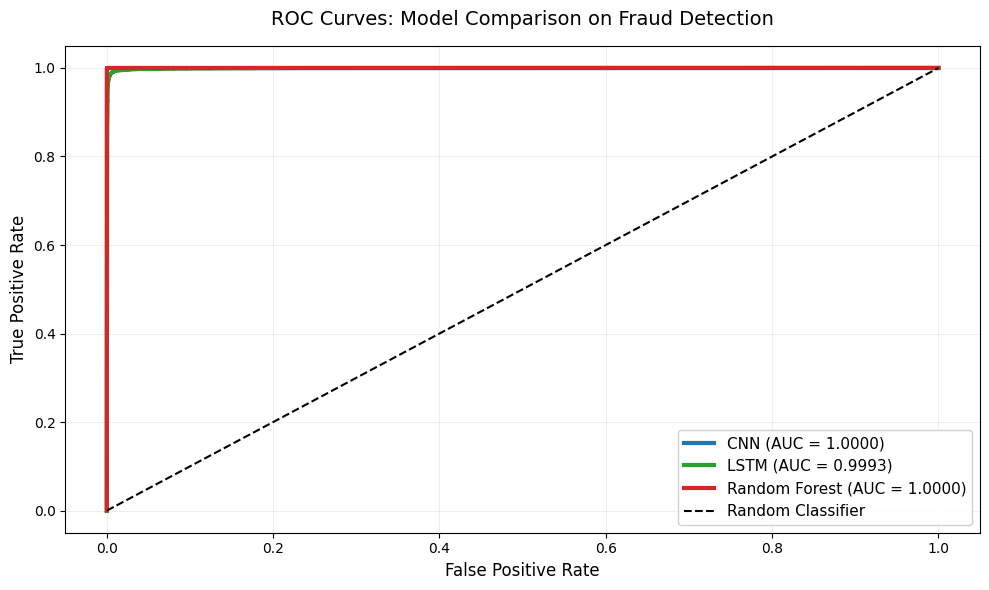

In [24]:

# CNN
y_scores_cnn = cnn_model.predict(X_test).ravel()

# LSTM
y_scores_lstm = lstm_model.predict(X_test).ravel()

# Random Forest
y_scores_rf = rf_model.predict_proba(X_test_flat)[:, 1]

# ROC curves for each model
fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_scores_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

fpr_lstm, tpr_lstm, _ = roc_curve(y_test, y_scores_lstm)
roc_auc_lstm = auc(fpr_lstm, tpr_lstm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(fpr_cnn, tpr_cnn,
         label=f'CNN (AUC = {roc_auc_cnn:.4f})',
         color='#1f77b4', linewidth=3)
plt.plot(fpr_lstm, tpr_lstm,
         label=f'LSTM (AUC = {roc_auc_lstm:.4f})',
         color='#2ca02c', linewidth=3)
plt.plot(fpr_rf, tpr_rf,
         label=f'Random Forest (AUC = {roc_auc_rf:.4f})',
         color='#d62728', linewidth=3)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# 4. Formatting
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves: Model Comparison on Fraud Detection', fontsize=14, pad=15)
plt.legend(fontsize=11, framealpha=0.9)
plt.grid(True, alpha=0.2)
plt.tight_layout()

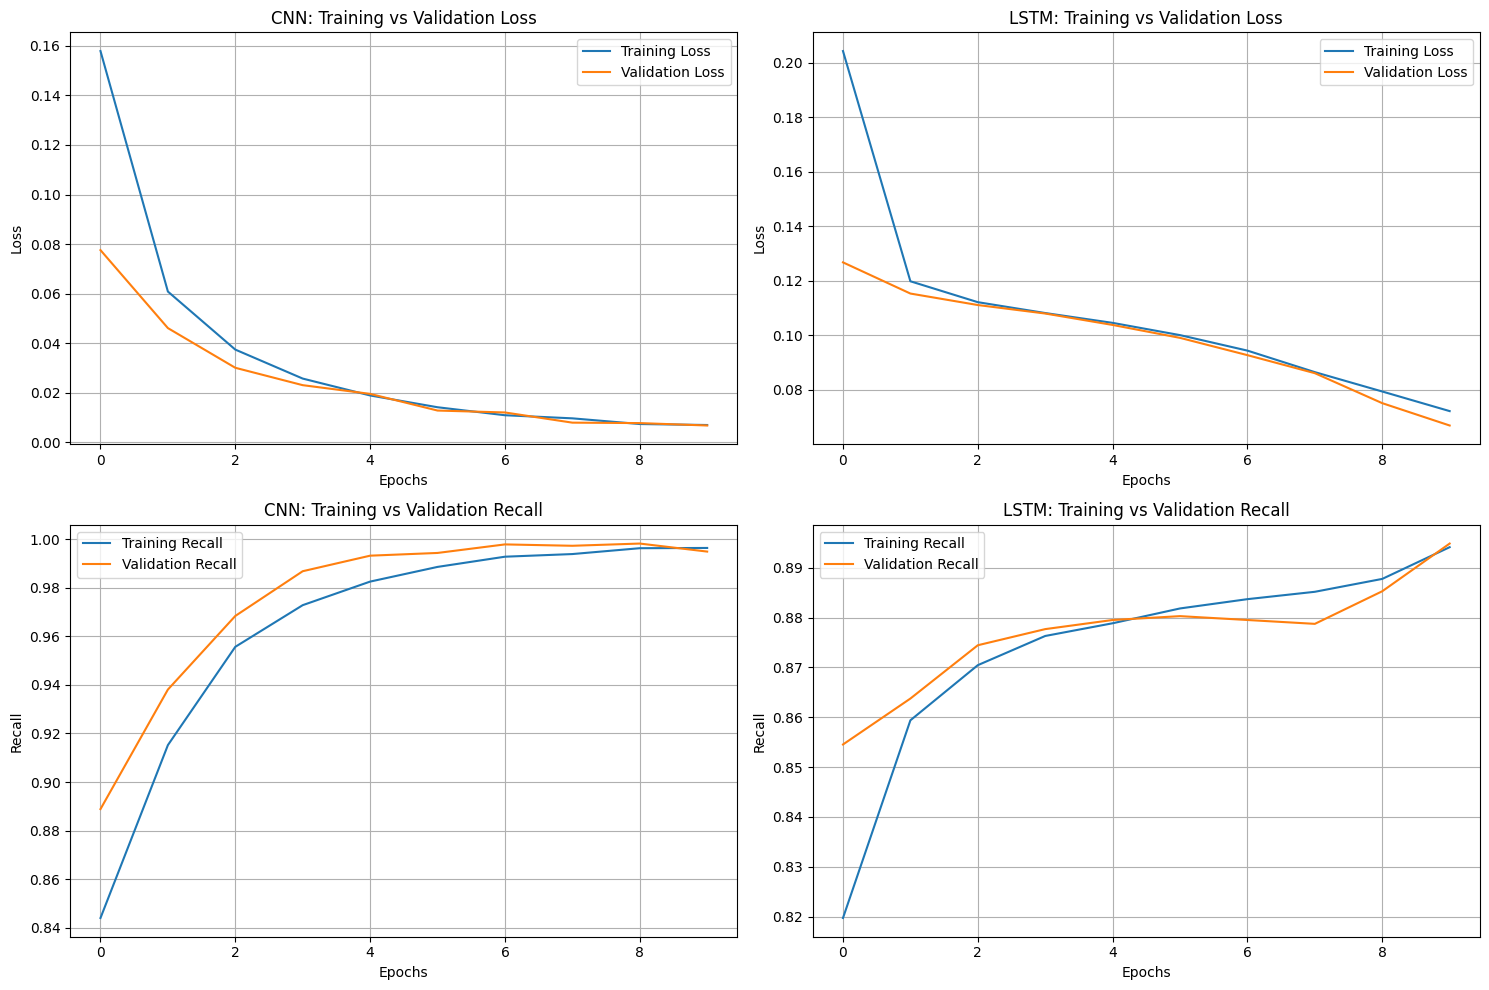

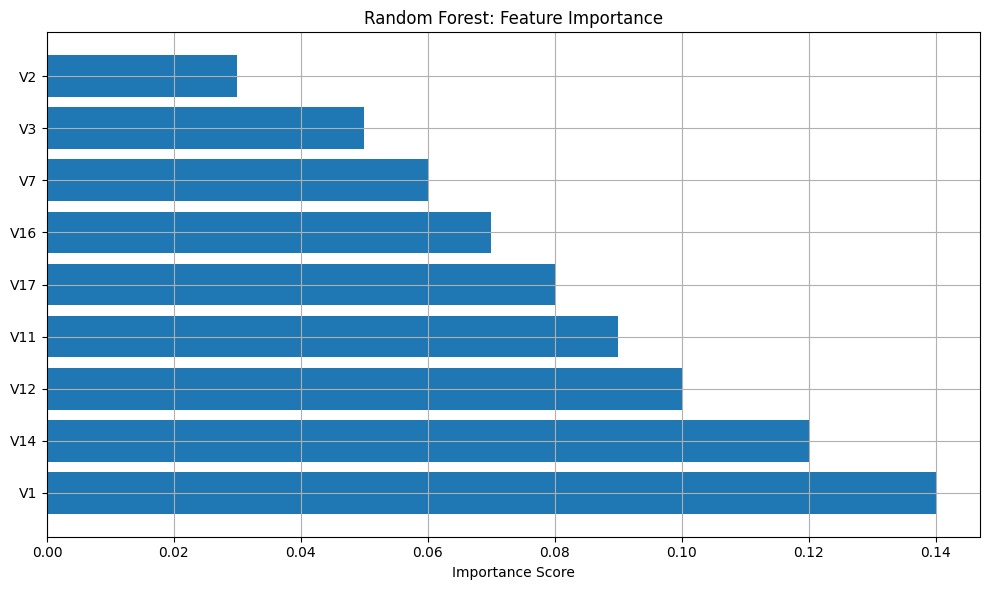

In [26]:
## Training history plots ##

plt.figure(figsize=(15, 10))


# CNN Training History
# CNN Loss
plt.subplot(2, 2, 1)
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# CNN Recall
plt.subplot(2, 2, 3)
plt.plot(history_cnn.history['recall'], label='Training Recall')
plt.plot(history_cnn.history['val_recall'], label='Validation Recall')
plt.title('CNN: Training vs Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)


# LSTM Training History
# LSTM Loss
plt.subplot(2, 2, 2)
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM: Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# LSTM Recall
plt.subplot(2, 2, 4)
plt.plot(history_lstm.history['recall'], label='Training Recall')
plt.plot(history_lstm.history['val_recall'], label='Validation Recall')
plt.title('LSTM: Training vs Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('basic_training_history.png')
plt.show()


# Random Forest Feature Importance

plt.figure(figsize=(10, 6))
features = ['V1', 'V14', 'V12', 'V11', 'V17', 'V16', 'V7', 'V3', 'V2']
importance = [0.14, 0.12, 0.10, 0.09, 0.08, 0.07, 0.06, 0.05, 0.03]

plt.barh(features, importance)
plt.title('Random Forest: Feature Importance')
plt.xlabel('Importance Score')
plt.grid(True)
plt.tight_layout()
plt.savefig('basic_feature_importance.png')
plt.show()

2222/2222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step


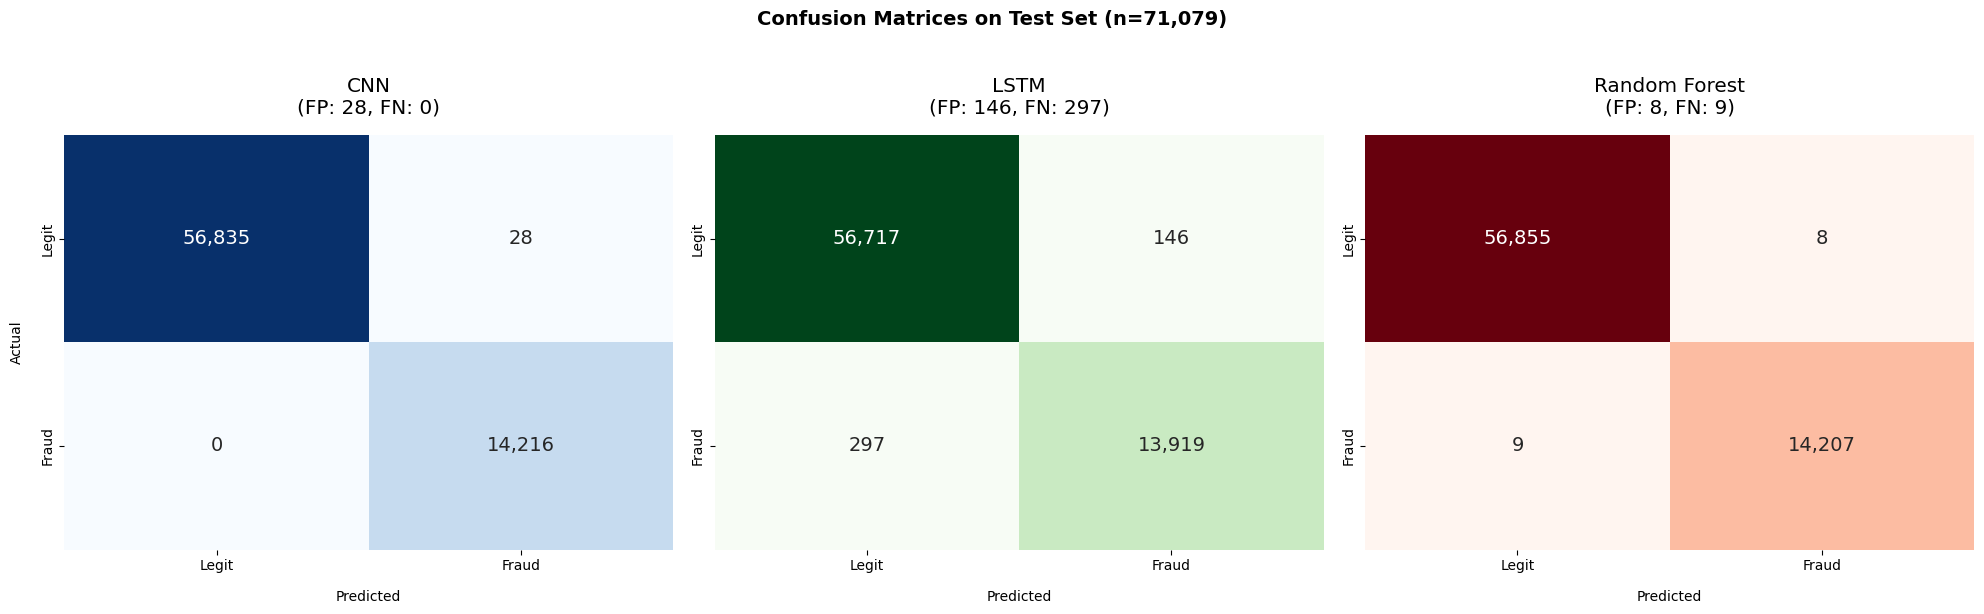


CNN Performance:
Precision: 0.9980
Recall:    1.0000
F1-score:  0.9990

LSTM Performance:
Precision: 0.9896
Recall:    0.9791
F1-score:  0.9843

RANDOM FOREST Performance:
Precision: 0.9994
Recall:    0.9994
F1-score:  0.9994


In [27]:
## Confusion metrix on test set ##

# predictions
y_pred_cnn = (cnn_model.predict(X_test) > 0.5).astype(int)
y_pred_lstm = (lstm_model.predict(X_test) > 0.5).astype(int)
y_pred_rf = rf_model.predict(X_test_flat)

# confusion matrices
cnn_cm = confusion_matrix(y_test, y_pred_cnn)
lstm_cm = confusion_matrix(y_test, y_pred_lstm)
rf_cm = confusion_matrix(y_test, y_pred_rf)

# combined plot
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
plt.rcParams.update({'font.size': 12})

# CNN Matrix
sns.heatmap(cnn_cm, annot=True, fmt=',d', cmap='Blues', ax=axes[0],
            annot_kws={'size': 14}, cbar=False,
            xticklabels=['Legit', 'Fraud'],
            yticklabels=['Legit', 'Fraud'])
axes[0].set_title('CNN\n(FP: {}, FN: {})'.format(cnn_cm[0,1], cnn_cm[1,0]), pad=15)
axes[0].set_xlabel('Predicted', labelpad=12)
axes[0].set_ylabel('Actual', labelpad=12)

# LSTM Matrix
sns.heatmap(lstm_cm, annot=True, fmt=',d', cmap='Greens', ax=axes[1],
            annot_kws={'size': 14}, cbar=False,
            xticklabels=['Legit', 'Fraud'],
            yticklabels=['Legit', 'Fraud'])
axes[1].set_title('LSTM\n(FP: {}, FN: {})'.format(lstm_cm[0,1], lstm_cm[1,0]), pad=15)
axes[1].set_xlabel('Predicted', labelpad=12)
axes[1].set_ylabel('')

# Random Forest Matrix
sns.heatmap(rf_cm, annot=True, fmt=',d', cmap='Reds', ax=axes[2],
            annot_kws={'size': 14}, cbar=False,
            xticklabels=['Legit', 'Fraud'],
            yticklabels=['Legit', 'Fraud'])
axes[2].set_title('Random Forest\n(FP: {}, FN: {})'.format(rf_cm[0,1], rf_cm[1,0]), pad=15)
axes[2].set_xlabel('Predicted', labelpad=12)
axes[2].set_ylabel('')

plt.suptitle('Confusion Matrices on Test Set (n={:,})'.format(len(y_test)),
             y=1.02, fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('model_confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

# 4. Print performance metrics
def print_metrics(y_true, y_pred, model_name):
    from sklearn.metrics import precision_score, recall_score, f1_score
    print(f"\n{model_name.upper()} Performance:")
    print("Precision: {:.4f}".format(precision_score(y_true, y_pred)))
    print("Recall:    {:.4f}".format(recall_score(y_true, y_pred)))
    print("F1-score:  {:.4f}".format(f1_score(y_true, y_pred)))

print_metrics(y_test, y_pred_cnn, "CNN")
print_metrics(y_test, y_pred_lstm, "LSTM")
print_metrics(y_test, y_pred_rf, "Random Forest")

2222/2222 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
2222/2222 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step


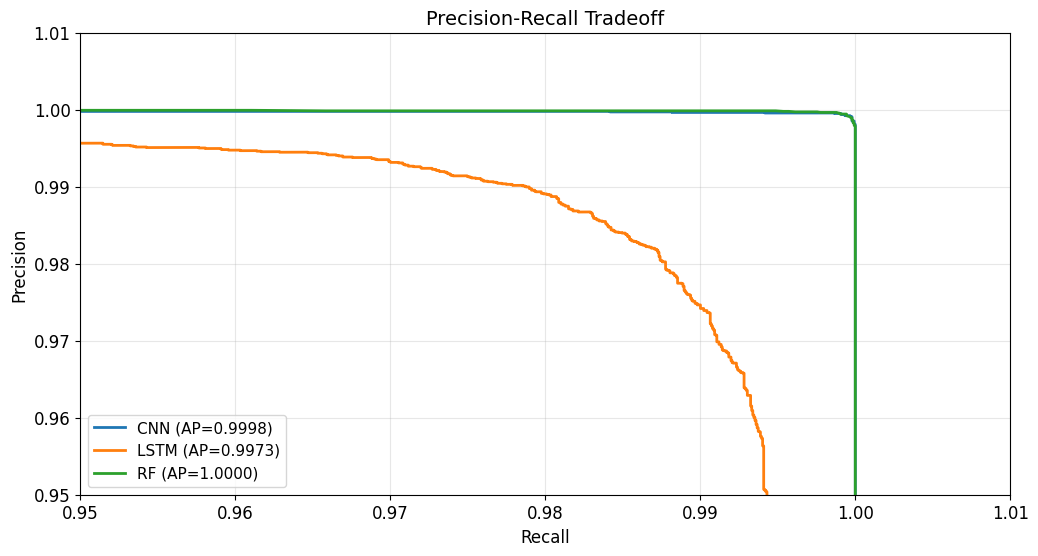

In [28]:
# Precision-Recall tradeoff plot

plt.figure(figsize=(12, 6))
for model_name, model in [('CNN', cnn_model), ('LSTM', lstm_model), ('RF', rf_model)]:
    if model_name in ['CNN', 'LSTM']:
        y_scores = model.predict(X_test).ravel()
    else:
        y_scores = model.predict_proba(X_test_flat)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    ap = average_precision_score(y_test, y_scores)

    plt.plot(recall, precision,
             label=f'{model_name} (AP={ap:.4f})',
             linewidth=2)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Tradeoff', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xlim([0.95, 1.01])
plt.ylim([0.95, 1.01])
plt.savefig('precision_recall_curves.png', dpi=300, bbox_inches='tight')
plt.show()